# Testing very basic fmri analyses and visualizations

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import mne
import pylsl
import stream_viewer
import PyQt5
import pyxdf

import sys
sys.path.append(r"C:\Users\Jake\App-SigVisualizer-master")

import os
import time
import random
from pylsl import StreamInfo, StreamOutlet, resolve_stream, StreamInlet
import pandas as pd
from mne import Annotations

import fooof
from fooof import FOOOF
from fooof import FOOOFGroup
import numpy as np
import pandas as pd
from mne.time_frequency import psd_array_welch

from IPython.display import display, clear_output

C:\Users\Jake\AppData\Local\Temp\ipykernel_15868\3478305097.py:25: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  import fooof


# Testing stupid stuff

MRI dimensions: (186, 186, 126)
MRI type: <class 'nibabel.nifti1.Nifti1Image'>
MRI array type: <class 'numpy.ndarray'>
MRI array shape: (186, 186, 126)


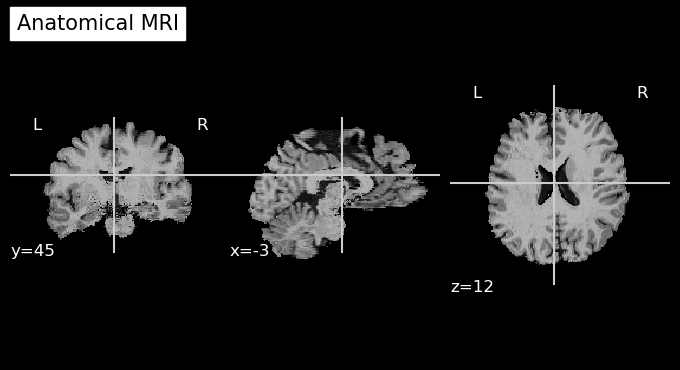

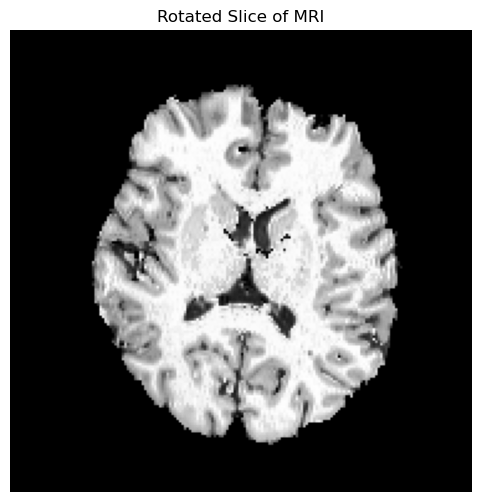

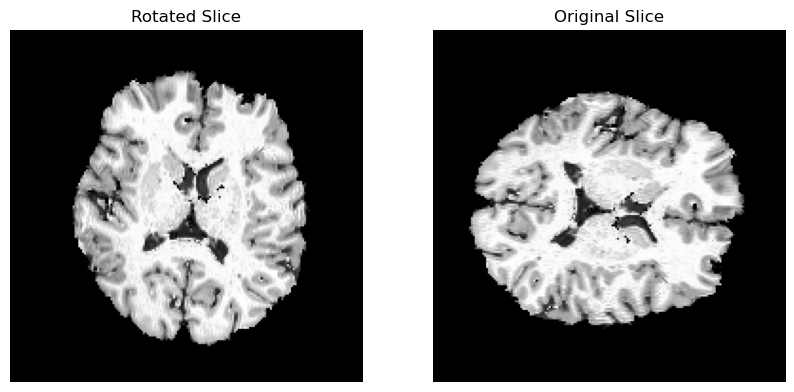

Figure saved as 'mri_slice_comparison.png'
Random data (5x5):
 [[0.7842427  0.66681248 0.32768793 0.87006583 0.76495587]
 [0.04368693 0.41958014 0.98157426 0.8902357  0.92786449]
 [0.36709836 0.33875473 0.54328927 0.63239931 0.19127807]
 [0.8061558  0.57915875 0.59387968 0.90780353 0.72469193]
 [0.5608822  0.64197341 0.02531653 0.19031339 0.70133692]]


## (BROKEN)

In [3]:
# Import necessary packages
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import datasets, image, masking

# Define project and data directories
project_directory = os.path.dirname(os.path.abspath("fmri_test"))
data_directory = os.path.join(project_directory, "fMRI_Data")

# Define file paths for each subject's resting state fMRI data
sub011_fmri_path = os.path.join(data_directory, "sub-011_task-rest_run-01_bold.nii.gz")
sub012_fmri_path = os.path.join(data_directory, "sub-012_task-rest_run-01_bold.nii.gz")

# Load the fMRI data using nibabel
fmri_011 = nib.load(sub011_fmri_path)
fmri_012 = nib.load(sub012_fmri_path)

# Fetch the Harvard-Oxford subcortical atlas
atlas = datasets.fetch_atlas_harvard_oxford('subcortical')
atlas_filename = atlas.maps
labels = atlas.labels

# Load the atlas image
atlas_img = nib.load(atlas_filename)
atlas_data = atlas_img.get_fdata()

# If the atlas is probabilistic (4D), convert it to a maximum probability (3D) map.
if atlas_data.ndim == 4:
    atlas_data = np.argmax(atlas_data, axis=-1)

# Identify the indices for the left and right amygdala in the atlas labels
left_idx = labels.index("Left Amygdala")
right_idx = labels.index("Right Amygdala")

# Create binary masks for left and right amygdala
left_mask = (atlas_data == left_idx)
right_mask = (atlas_data == right_idx)

# Combine left and right amygdala masks
amygdala_mask_data = np.logical_or(left_mask, right_mask)

# Create a Nifti image for the combined amygdala mask
amygdala_mask_img = nib.Nifti1Image(amygdala_mask_data.astype(np.int16), affine=atlas_img.affine)

# Resample the amygdala mask to each subject's fMRI image space (if necessary)
amygdala_mask_resampled_011 = image.resample_to_img(amygdala_mask_img, fmri_011, interpolation='nearest')
amygdala_mask_resampled_012 = image.resample_to_img(amygdala_mask_img, fmri_012, interpolation='nearest')

# Extract the BOLD time series from the amygdala for each subject using the resampled masks
ts_011 = masking.apply_mask(fmri_011, amygdala_mask_resampled_011)
ts_012 = masking.apply_mask(fmri_012, amygdala_mask_resampled_012)

# Compute the mean time series across all amygdala voxels for each subject
mean_ts_011 = np.mean(ts_011, axis=1)
mean_ts_012 = np.mean(ts_012, axis=1)

# Compute summary statistics (e.g., mean activation over time)
mean_activation_011 = np.mean(mean_ts_011)
mean_activation_012 = np.mean(mean_ts_012)

print("Sub-011 mean amygdala activation (resting state):", mean_activation_011)
print("Sub-012 mean amygdala activation (resting state):", mean_activation_012)

# Plot the mean BOLD time series for visual comparison
plt.figure(figsize=(12, 6))
plt.plot(mean_ts_011, label='Sub-011')
plt.plot(mean_ts_012, label='Sub-012')
plt.xlabel("Time (scans)")
plt.ylabel("Mean BOLD Signal in Amygdala")
plt.title("Comparison of Amygdala Activation during Resting State")
plt.legend()
plt.show()


ValueError: Invalid atlas name: subcortical. Please choose an atlas among:
cort-maxprob-thr0-1mm
cort-maxprob-thr0-2mm
cort-maxprob-thr25-1mm
cort-maxprob-thr25-2mm
cort-maxprob-thr50-1mm
cort-maxprob-thr50-2mm
cort-prob-1mm
cort-prob-2mm
cortl-maxprob-thr0-1mm
cortl-maxprob-thr0-2mm
cortl-maxprob-thr25-1mm
cortl-maxprob-thr25-2mm
cortl-maxprob-thr50-1mm
cortl-maxprob-thr50-2mm
cortl-prob-1mm
cortl-prob-2mm
sub-maxprob-thr0-1mm
sub-maxprob-thr0-2mm
sub-maxprob-thr25-1mm
sub-maxprob-thr25-2mm
sub-maxprob-thr50-1mm
sub-maxprob-thr50-2mm
sub-prob-1mm
sub-prob-2mm

## loads sub-012’s anatomical and resting-state data, computes a mean activation map from the resting-state image, restricts it to the amygdala (using the Harvard–Oxford atlas), and then overlays this activation onto the T1 anatomical in a 3D visualization.

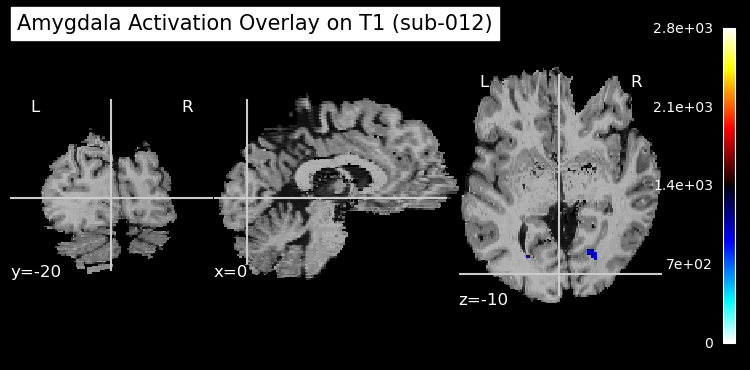

In [6]:
# Import necessary packages
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting, image, datasets
from nilearn.image import math_img, resample_to_img

# Define project and data directories
project_directory = os.path.dirname(os.path.abspath("fmri_test"))
data_directory = os.path.join(project_directory, "fMRI_Data")

# File paths for sub-012 anatomical and resting-state fMRI data
t1_path = os.path.join(data_directory, "sub-012_T1w.nii.gz")
fmri_path = os.path.join(data_directory, "sub-012_task-rest_run-01_bold.nii.gz")

# Load the T1-weighted anatomical and fMRI images
t1_img = nib.load(t1_path)
fmri_img = nib.load(fmri_path)

# Compute the mean fMRI image over time (serving as a proxy for activation)
mean_fmri_img = image.mean_img(fmri_img)

# Fetch the Harvard-Oxford subcortical atlas using a valid atlas name
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr0-2mm')
atlas_img = atlas.maps  # atlas.maps is already a Nifti1Image
labels = atlas.labels

# Get atlas data from the atlas image
atlas_data = atlas_img.get_fdata()

# Identify the indices for the left and right amygdala in the atlas labels.
left_idx = labels.index("Left Amygdala")
right_idx = labels.index("Right Amygdala")

# Create binary masks for the left and right amygdala
left_mask = (atlas_data == left_idx)
right_mask = (atlas_data == right_idx)

# Combine the left and right masks into a single amygdala mask
amygdala_mask_data = np.logical_or(left_mask, right_mask)

# Create a Nifti image for the combined amygdala mask
amygdala_mask_img = nib.Nifti1Image(amygdala_mask_data.astype(np.int16), atlas_img.affine)

# Resample the amygdala mask to the fMRI image space (if necessary)
amygdala_mask_resampled = resample_to_img(amygdala_mask_img, fmri_img, interpolation='nearest')

# Compute the activation within the amygdala by masking the mean fMRI image
amygdala_activation_img = math_img("img1 * img2", img1=mean_fmri_img, img2=amygdala_mask_resampled)

# Visualize the amygdala activation overlaid on the subject's anatomical T1 image
display = plotting.plot_stat_map(
    amygdala_activation_img,
    bg_img=t1_img,
    title="Amygdala Activation Overlay on T1 (sub-012)",
    threshold=0.0,         # Show all nonzero activation values
    display_mode='ortho',  # Display orthogonal slices (axial, sagittal, coronal)
    cut_coords=(0, -20, -10)  # Adjust these coordinates as needed
)
plt.show()


In [9]:
# Import necessary packages
import os
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting, image
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define project and data directories
project_directory = os.path.dirname(os.path.abspath("fmri_test"))
data_directory = os.path.join(project_directory, "fMRI_Data")

# File paths for sub-012 anatomical and resting-state fMRI data
t1_path = os.path.join(data_directory, "sub-011_T1w.nii.gz")
fmri_path = os.path.join(data_directory, "sub-011_task-rest_run-01_bold.nii.gz")

# Load the T1-weighted anatomical and fMRI images
t1_img = nib.load(t1_path)
fmri_img = nib.load(fmri_path)

# Determine the number of timepoints in the 4D fMRI image
n_vols = fmri_img.shape[3]
print("Number of timepoints:", n_vols)

# Define an update function that extracts the 3D volume at a given time index
def update_view(time_index):
    # Extract a 3D volume from the 4D fMRI image
    vol_img = image.index_img(fmri_img, time_index)
    # Clear previous output and display the updated plot
    clear_output(wait=True)
    display(plotting.plot_stat_map(
        vol_img,
        bg_img=t1_img,
        title=f"Resting State fMRI at Timepoint {time_index}",
        threshold=0.0,       # Adjust threshold as needed
        display_mode='ortho' # Orthogonal view: axial, sagittal, and coronal
    ))

# Create an interactive slider to move through the time dimension
time_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=n_vols - 1,
    step=1,
    description='Timepoint:',
    continuous_update=False
)

# Use the slider to update the 3D view interactively
widgets.interact(update_view, time_index=time_slider)


Number of timepoints: 256


interactive(children=(IntSlider(value=0, continuous_update=False, description='Timepoint:', max=255), Output()…

<function __main__.update_view(time_index)>

## trying to get the average for the whole time-series

In [4]:
# Import necessary packages
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

# Define project and data directories
project_directory = os.path.dirname(os.path.abspath("fmri_test"))
data_directory = os.path.join(project_directory, "fMRI_Data")

# File paths for sub-012 resting-state fMRI and T1-weighted anatomical data
fmri_path = os.path.join(data_directory, "sub-012_task-rest_run-01_bold.nii.gz")
t1_path = os.path.join(data_directory, "sub-012_T1w.nii.gz")

# Load the images
fmri_img = nib.load(fmri_path)
t1_img = nib.load(t1_path)

# Load the fMRI data as float32 to reduce memory usage
fmri_data = fmri_img.get_fdata(dtype=np.float32)

# Compute the voxel-wise standard deviation over time (as a measure of activity)
std_map = np.std(fmri_data, axis=3)

# Create a new Nifti image from the standard deviation map
std_img = nib.Nifti1Image(std_map, fmri_img.affine)

# Visualize the standard deviation map overlaid on the T1 anatomical image.
display = plotting.plot_stat_map(
    std_img,
    bg_img=t1_img,
    title="Voxel-wise Temporal Variability (Resting fMRI, sub-012)",
    threshold=0.0,       # Adjust threshold if needed
    display_mode='ortho', # Orthogonal view: axial, sagittal, coronal
    cut_coords=(0, -20, 0)  # Adjust coordinates for an optimal view
)
plt.show()


MemoryError: Unable to allocate 4.06 GiB for an array with shape (186, 186, 123, 256) and data type float32

# Testing a random fMRI tutorial I found online

## anatomical

MRI dimensions: (186, 186, 126)
MRI type: <class 'nibabel.nifti1.Nifti1Image'>
MRI array type: <class 'numpy.ndarray'>
MRI array shape: (186, 186, 126)


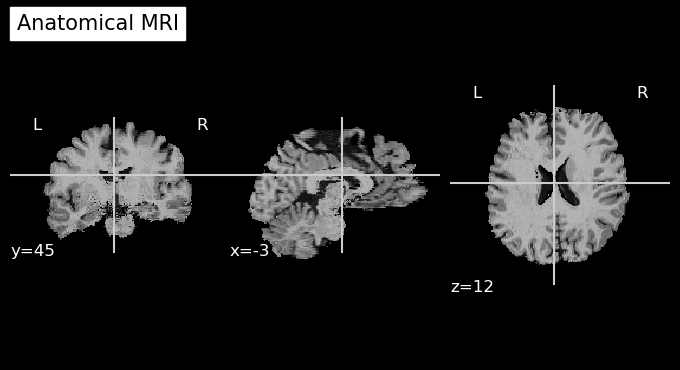

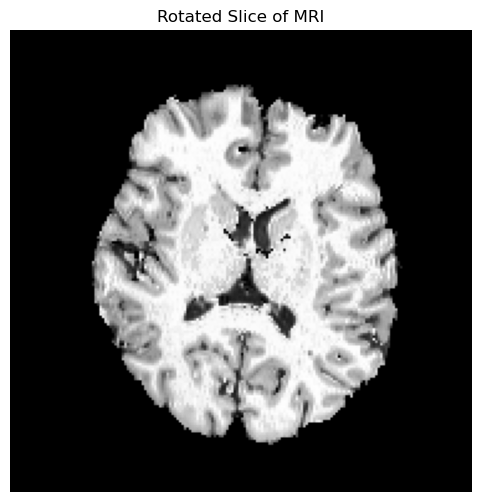

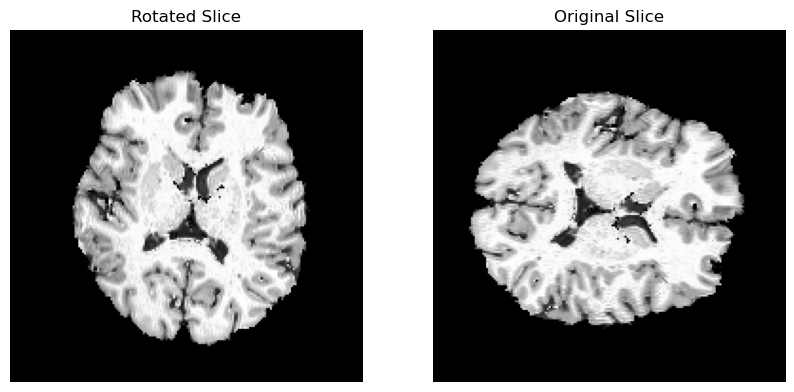

In [2]:
import nibabel as nib
from nilearn import plotting, image
import numpy as np
import matplotlib.pyplot as plt


project_directory = os.path.dirname(os.path.abspath("fmri_test"))
data_directory = os.path.join(project_directory, "fMRI_Data")

# File paths for sub-012 anatomical and resting-state fMRI data
t1_path = os.path.join(data_directory, "sub-012_T1w.nii.gz")

mri = image.load_img(t1_path)

# Print dimensions of MRI image
print("MRI dimensions:", mri.shape)

# Print type of MRI image
print("MRI type:", type(mri))

# Print MRI image using Nilearn (static view)
plotting.plot_anat(mri, title="Anatomical MRI")
# To see the documentation for plotting.plot_anat, select the function and press Shift+Tab.

# Make an interactive plotting (use plotting.view_img with bg_img=None)
interactive_view = plotting.view_img(mri, bg_img=None)

# Convert nibabel file to numpy array using get_fdata()
mri_array = mri.get_fdata()

# Check and print type and dimensions of the numpy array
print("MRI array type:", type(mri_array))
print("MRI array shape:", mri_array.shape)

# Plot one slice of the image (using np.rot90 to rotate the slice)
# Choose a slice index (using the middle slice along the third dimension)
slice_index = mri_array.shape[2] // 2
plt.figure(figsize=(6, 6))
plt.imshow(np.rot90(mri_array[:, :, slice_index]), cmap='gray')
plt.title("Rotated Slice of MRI")
plt.axis('off')
plt.show()

# Using subplots to compare the rotated and original slice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(np.rot90(mri_array[:, :, slice_index]), cmap='gray')
ax1.set_title("Rotated Slice")
ax1.axis('off')
ax2.imshow(mri_array[:, :, slice_index], cmap='gray')
ax2.set_title("Original Slice")
ax2.axis('off')
plt.show()



## functional

In [ ]:
# Load data
import os
import nibabel as nib
from nilearn import plotting, image
import numpy as np
import matplotlib.pyplot as plt

# Define project and data directories
project_directory = os.path.dirname(os.path.abspath("fmri_test"))
data_directory = os.path.join(project_directory, "fMRI_Data")

# Define file path for subject sub-011 resting state fMRI data
sub011_fmri_path = os.path.join(data_directory, "sub-011_task-rest_run-01_bold.nii.gz")
fmri = image.load_img(sub011_fmri_path)

# Print dimensions and type of data
print("fMRI image dimensions:", fmri.shape)
print("fMRI image type:", type(fmri))

# Instead of loading the full time series, extract the first quarter of the time series.
n_timepoints = fmri.shape[3]
quarter = n_timepoints // 4
fmri_subset = image.index_img(fmri, slice(0, quarter))
print("Subset image dimensions:", fmri_subset.shape)

# Select one volume from the subset (e.g., the first volume)
vol0 = image.index_img(fmri_subset, 0)
print("Selected volume shape:", vol0.shape)

# Make a plot of the selected volume using plotting.plot_epi
plotting.plot_epi(vol0, title="fMRI Volume 0 from Subset (EPI)")
plt.show()

# Convert the nibabel file (subset) to a numpy array using get_fdata() with dtype float32
fmri_array = fmri_subset.get_fdata(dtype=np.float32)
print("Numpy array type:", type(fmri_array))
print("Numpy array shape:", fmri_array.shape)

# Plot the timeseries of a selected voxel.
# For example, choose a voxel at the center of the volume.
x = fmri_array.shape[0] // 2
y = fmri_array.shape[1] // 2
z = fmri_array.shape[2] // 2
voxel_ts = fmri_array[x, y, z, :]  # Extract timeseries for the selected voxel

plt.figure(figsize=(10, 4))
plt.plot(voxel_ts, label="Voxel Timeseries")
plt.xlabel("Timepoints (subset)")
plt.ylabel("Signal Intensity")
plt.title("Voxel Timeseries at (x={}, y={}, z={})".format(x, y, z))

# Generate a random timeseries of the same length as the subset's time


In [14]:
import nibabel as nib

project_directory = os.path.dirname(os.path.abspath("fmri_test"))
data_directory = os.path.join(project_directory, "fMRI_Data")

# Define file path for subject sub-011 resting state fMRI data
sub011_fmri_path = os.path.join(data_directory, "sub-011_task-rest_run-01_bold.nii.gz")

fmri_img = nib.load(sub011_fmri_path)
print("TR:", fmri_img.header['pixdim'][4])

print(fmri_img.header)

TR: 2.34
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  4 186 186 123 256   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         1.1021506  1.1021506  1.1        2.34       0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : alternating increasing
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=28;Time=114654.620;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x